In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from lenstools import dataExtern,ConvergenceMap,ShearMap
import os, glob
from astropy.io import fits

# from lenstools.image.convergence import Spin0
from lenstools.statistics.ensemble import Series,Ensemble
from lenstools.statistics.constraints import Emulator
from lenstools.statistics.contours import ContourPlot

%matplotlib inline

In [3]:
datapath = "../../data/convergence_maps/"
conv_map_path = os.path.join(datapath, "convergence_maps1", "WLconv_z1.00_5805r.fits")
conv_map = ConvergenceMap.load(conv_map_path)

In [4]:
for _, dirs, _ in os.walk(datapath):
    for d in dirs: 
        for _r, _d, _f in os.walk(os.path.join(datapath, d)):
            print(_r)
            break

../../data/convergence_maps/convergence_maps2
../../data/convergence_maps/convergence_maps1
../../data/convergence_maps/convergence_maps3


In [5]:
hdul = fits.open(conv_map_path)
hdul.info()

Filename: ../../data/convergence_maps/convergence_maps1/WLconv_z1.00_5805r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1024, 1024)   float32   


In [6]:
hdul[0].header["H"]

0.72

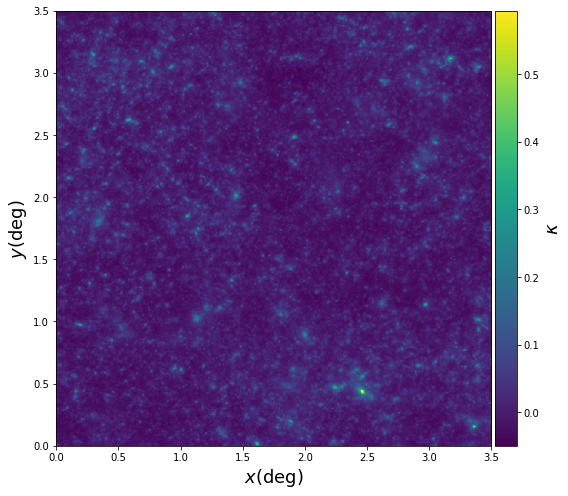

In [7]:
#Plot setup
fig,ax = plt.subplots(figsize=(8,8))
 
#Smooth on 1 arcmin
# conv_map.smooth(1.0*u.arcmin,kind="gaussianFFT",inplace=True)

#Find the peak locations and height
sigma_peaks = np.linspace(-2.,11.,101)
height,positions = conv_map.locatePeaks(sigma_peaks,norm=True)

#Show the map and the peaks on it (left panel)
conv_map.visualize(fig=fig,ax=ax,colorbar=True,cbar_label=r"$\kappa$")
# ax.scatter(*positions[height>2.].to(u.deg).value.T,color="black",marker="x")
ax.set_xlim(0,conv_map.side_angle.to(u.deg).value)
ax.set_ylim(0,conv_map.side_angle.to(u.deg).value)
fig.tight_layout()

In [8]:
conv_map.info

Pixels on a side: 1024
Pixel size: 12.3046875 arcsec
Total angular size: 3.5 deg
lmin=1.0e+02 ; lmax=7.4e+04


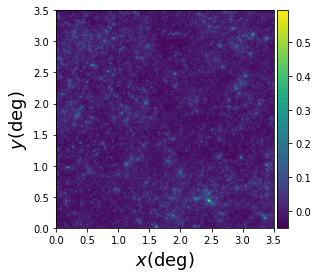

In [9]:
conv_map.visualize(colorbar=True)

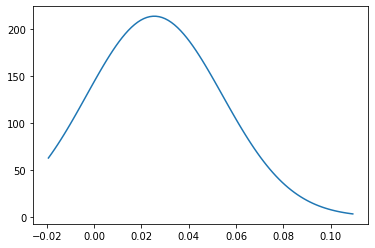

In [10]:
conv_map.gaussianPeakHistogram(thresholds=np.linspace(-2.,11.,101)/100)

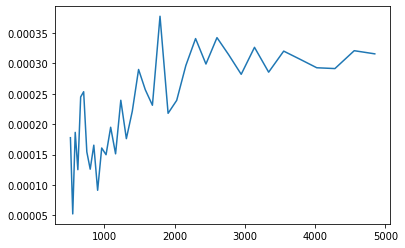

In [12]:
l, power_spectrum = conv_map.powerSpectrum(l_edges=np.logspace(np.log10(500), np.log10(5000), 38))
plt.plot(l, l * (l + 1)*power_spectrum / 2 / np.pi)

In [21]:
power_spectrum

array([4.18680210e-09, 1.09038051e-09, 3.42514359e-09, 2.02971627e-09,
       3.50490761e-09, 3.20415929e-09, 1.72437574e-09, 1.24245711e-09,
       1.44075172e-09, 7.02015678e-10, 1.09181249e-09, 8.97975251e-10,
       1.03201812e-09, 7.06958420e-10, 9.87865731e-10, 6.42255803e-10,
       7.11991594e-10, 8.23995809e-10, 6.44155320e-10, 5.12120636e-10,
       7.38584556e-10, 3.76401136e-10, 3.64808860e-10, 3.99322947e-10,
       4.05291947e-10, 3.13932045e-10, 3.17462578e-10, 2.57193882e-10,
       2.03887539e-10, 2.08346629e-10, 1.60962087e-10, 1.59351829e-10,
       1.34933308e-10, 1.13624146e-10, 9.98682698e-11, 9.70731703e-11,
       8.43318655e-11])

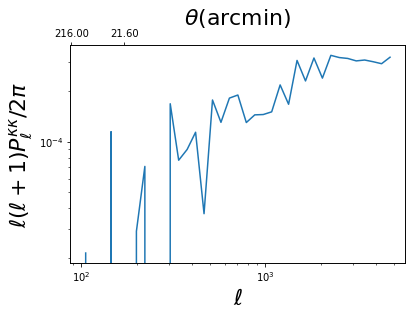

In [78]:
conv_map.plotPowerSpectrum(np.logspace(2, np.log10(5000), 38))

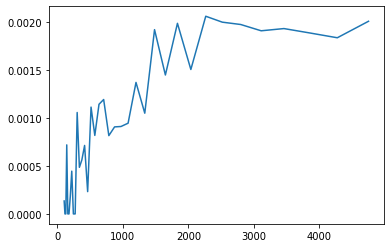

In [82]:
l, bispectrum = conv_map.powerSpectrum(l_edges=np.logspace(2, np.log10(5000), 38))
plt.plot(l, l * (l + 1) * bispectrum)